In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.3)
# 查看数据形状
print("训练集样本数据", x_train.shape[0])
print("测试集样本数据", x_test.shape[0])

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 score: {r2:.2f}')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


训练集样本数据 354
测试集样本数据 152
Mean Squared Error: 23.58
R2 score: 0.69


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

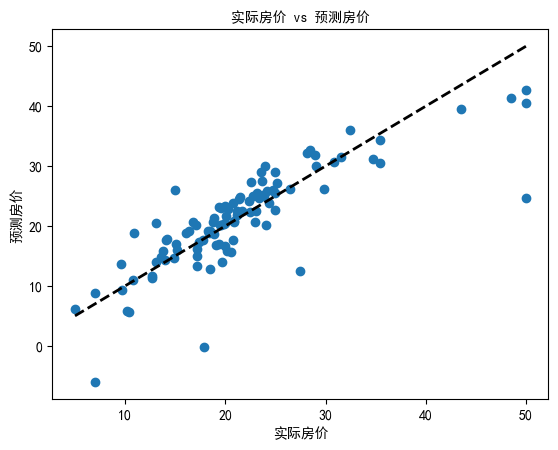

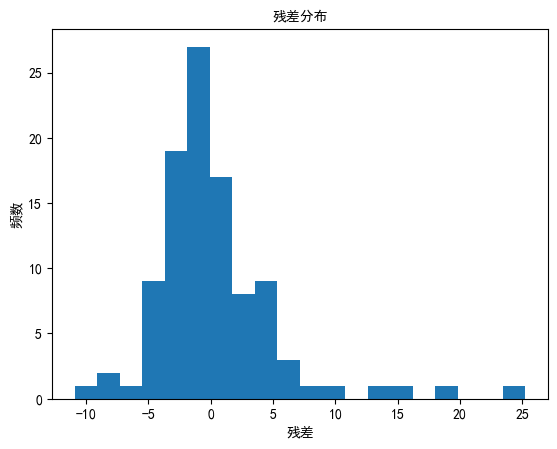

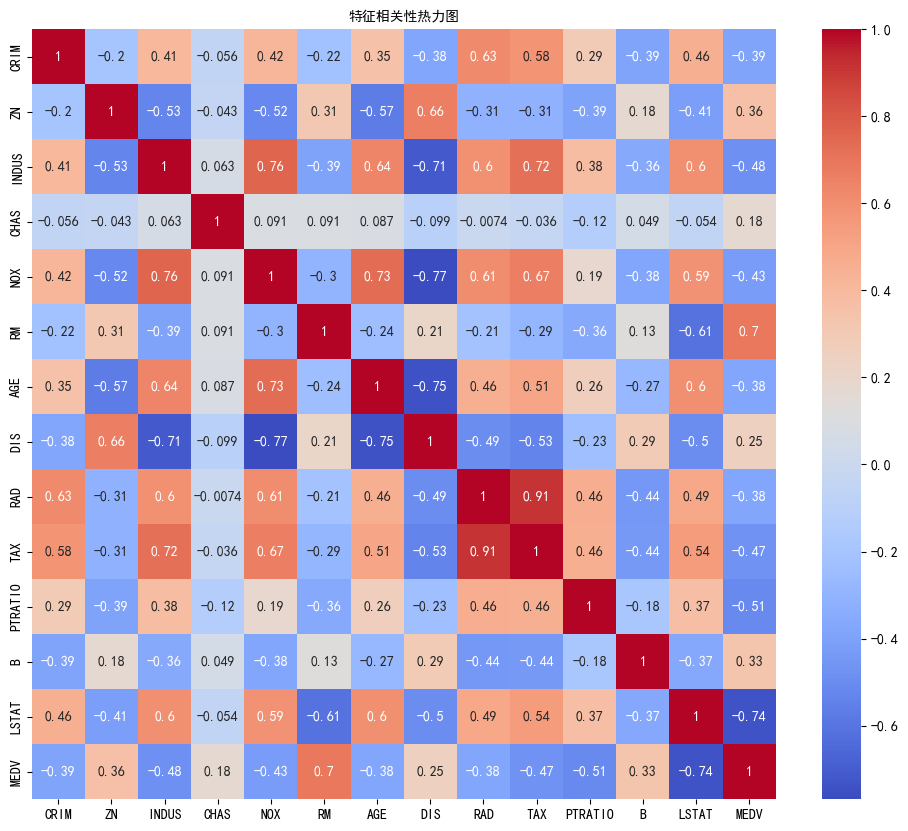

RM          4.438835
CHAS        2.784438
RAD         0.262430
INDUS       0.040381
ZN          0.030110
B           0.012351
AGE        -0.006296
TAX        -0.010647
CRIM       -0.113056
LSTAT      -0.508571
PTRATIO    -0.915456
DIS        -1.447865
NOX       -17.202633
dtype: float64


In [3]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 设置中文字体
font = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf')  # 替换为你的系统中的中文字体路径

# 加载本地数据
file_path = r'C:\Users\32956\Desktop\ML\机器学习\实验任务二\data\boston_housing.csv'
df = pd.read_csv(file_path)

# 数据探索
print(df.head())
print(df.describe())
print(df.columns)  # 打印列名，确认列名是否正确

# 检查是否有缺失值
print(df.isnull().sum())

# 填充缺失值或删除缺失数据（根据具体情况处理）
# df = df.fillna(method='ffill')  # 例如，用前一个值填充缺失值

# 划分训练集和测试集
X = df.drop('MEDV', axis=1)  # 修改为 'MEDV'
y = df['MEDV']  # 修改为 'MEDV'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'均方误差（MSE）：{mse}')
print(f'R²值：{r2}')

# 可视化真实房价与预测房价
plt.scatter(y_test, y_pred)
plt.xlabel('实际房价', fontproperties=font)
plt.ylabel('预测房价', fontproperties=font)
plt.title('实际房价 vs 预测房价', fontproperties=font)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# 残差分析
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('残差', fontproperties=font)
plt.ylabel('频数', fontproperties=font)
plt.title('残差分布', fontproperties=font)
plt.show()

# 特征相关性分析
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('特征相关性热力图', fontproperties=font)
plt.show()

# 特征重要性分析
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.sort_values(ascending=False)
print(coefficients)


In [4]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 设置中文字体
font = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf')  # 替换为你的系统中的中文字体路径

# 加载本地数据
file_path = r'C:\Users\32956\Desktop\ML\机器学习\实验任务二\data\boston_housing.csv'
df = pd.read_csv(file_path)

# 数据探索
print(df.head())
print(df.describe())

# 特征与标签分离
X = df.drop('MEDV', axis=1)  # 特征
y = df['MEDV']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'均方误差（MSE）：{mse}')
print(f'R²值：{r2}')

# 图 5：可视化真实值与预测值的散点图
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 理想预测线
plt.xlabel('实际房价', fontproperties=font)
plt.ylabel('预测房价', fontproperties=font)
plt.title('实际房价 vs 预测房价', fontproperties=font)
plt.show()

# 图 7：残差分布图
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(residuals.mean(), color='red', linestyle='--', lw=2)
plt.xlabel('残差', fontproperties=font)
plt.ylabel('频数', fontproperties=font)
plt.title('残差分布', fontproperties=font)
plt.show()

# 图 10：特征相关性热力图
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('特征相关性热力图', fontproperties=font)
plt.show()

# 图 12：特征重要性条形图
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title('特征重要性排序', fontproperties=font)
plt.xlabel('系数值', fontproperties=font)
plt.ylabel('特征', fontproperties=font)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Administrator\\Desktop\\ML\\机器学习\\实验任务二\\data\\boston_housing.csv'

In [ ]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

# 设置中文字体
font = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf')  # 修改为系统中中文字体的路径

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 数据探索
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = y
print(df.head())

# 特征关系可视化
sns.pairplot(df, hue='Species')
plt.show()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)

# 混淆矩阵和分类报告
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('预测值', fontproperties=font)
plt.ylabel('实际值', fontproperties=font)
plt.title('混淆矩阵', fontproperties=font)
plt.show()

print(classification_report(y_test, y_pred, target_names=target_names))

# 可视化逻辑回归决策边界（选取两个特征）
X_two_features = X[:, :2]  # 选择两个特征
X_train, X_test, y_train, y_test = train_test_split(X_two_features, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

x_min, x_max = X_two_features[:, 0].min() - 1, X_two_features[:, 0].max() + 1
y_min, y_max = X_two_features[:, 1].min() - 1, X_two_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('花萼长度(cm)', fontproperties=font)
plt.ylabel('花萼宽度(cm)', fontproperties=font)
plt.title('逻辑回归决策边界', fontproperties=font)
plt.show()
